In [1]:
%pylab inline
import networkx as nx

import cv2
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


(<matplotlib.image.AxesImage at 0x7f2688c917b8>, Text(0.5, 1.0, 'ORIGINAL'))

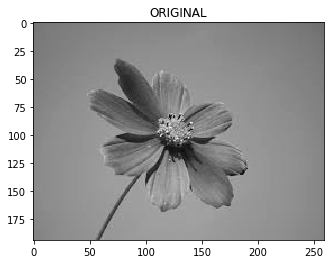

In [5]:
img1 = cv2.imread('flower.jpeg',0)
plt.imshow(img1,'gray'),plt.title('ORIGINAL')

In [7]:
#Building the graph
print(img1.shape[0]*img1.shape[1])
b = 8
Gimg2 = nx.DiGraph()

for i in range(1,img1.shape[0]-1):
    for j in range(1,img1.shape[1]-1):
        Gimg2.add_edge(b, b-7 , weight = np.abs( int(img1[i-1,j-1]) - img1[i,j]) )
        Gimg2.add_edge(b, b-6 , weight = np.abs( int(img1[i-1,j]) - img1[i,j]) )
        Gimg2.add_edge(b, b-5 , weight = np.abs( int(img1[i-1,j+1]) - img1[i,j]) )
        
        Gimg2.add_edge(b, b-1 , weight = np.abs( int(img1[i,j-1]) - img1[i,j]) )
        Gimg2.add_edge(b, b+1 , weight = np.abs( int(img1[i,j-1]) - img1[i,j]) )
        
        Gimg2.add_edge(b, b+5 , weight = np.abs( int(img1[i+1,j-1]) - img1[i,j]) )
        Gimg2.add_edge(b, b+6 , weight = np.abs( int(img1[i+1,j]) - img1[i,j]) )
        Gimg2.add_edge(b, b+7 , weight = np.abs( int(img1[i+1,j+1]) - img1[i,j]) )
        b = b + 1

50246


In [9]:
#measures
from networkx.algorithms import approximation as approx
print(approx.local_node_connectivity(Gimg2, 8, 40000))
print(nx.degree_assortativity_coefficient(Gimg2))
print(nx.average_neighbor_degree(Gimg2))
print(nx.degree_centrality(Gimg2))
print(nx.clustering(Gimg2))
print(nx.average_clustering(Gimg2))

4
nan
{8: 4.0, 1: 0.0, 2: 0.0, 3: 0.0, 7: 0.0, 9: 5.0, 13: 6.0, 14: 7.0, 15: 8.0, 4: 0.0, 10: 5.0, 16: 8.0, 5: 0.0, 11: 5.0, 17: 8.0, 6: 0.0, 12: 5.0, 18: 8.0, 19: 8.0, 20: 8.0, 21: 8.0, 22: 8.0, 23: 8.0, 24: 8.0, 25: 8.0, 26: 8.0, 27: 8.0, 28: 8.0, 29: 8.0, 30: 8.0, 31: 8.0, 32: 8.0, 33: 8.0, 34: 8.0, 35: 8.0, 36: 8.0, 37: 8.0, 38: 8.0, 39: 8.0, 40: 8.0, 41: 8.0, 42: 8.0, 43: 8.0, 44: 8.0, 45: 8.0, 46: 8.0, 47: 8.0, 48: 8.0, 49: 8.0, 50: 8.0, 51: 8.0, 52: 8.0, 53: 8.0, 54: 8.0, 55: 8.0, 56: 8.0, 57: 8.0, 58: 8.0, 59: 8.0, 60: 8.0, 61: 8.0, 62: 8.0, 63: 8.0, 64: 8.0, 65: 8.0, 66: 8.0, 67: 8.0, 68: 8.0, 69: 8.0, 70: 8.0, 71: 8.0, 72: 8.0, 73: 8.0, 74: 8.0, 75: 8.0, 76: 8.0, 77: 8.0, 78: 8.0, 79: 8.0, 80: 8.0, 81: 8.0, 82: 8.0, 83: 8.0, 84: 8.0, 85: 8.0, 86: 8.0, 87: 8.0, 88: 8.0, 89: 8.0, 90: 8.0, 91: 8.0, 92: 8.0, 93: 8.0, 94: 8.0, 95: 8.0, 96: 8.0, 97: 8.0, 98: 8.0, 99: 8.0, 100: 8.0, 101: 8.0, 102: 8.0, 103: 8.0, 104: 8.0, 105: 8.0, 106: 8.0, 107: 8.0, 108: 8.0, 109: 8.0, 110: 8.0, 1

{8: 0.3225806451612903, 1: 0, 2: 1.0, 3: 0.6666666666666666, 7: 0.6666666666666666, 9: 0.3835616438356164, 13: 0.3764705882352941, 14: 0.42857142857142855, 15: 0.42857142857142855, 4: 0.6666666666666666, 10: 0.3835616438356164, 16: 0.42857142857142855, 5: 0.6666666666666666, 11: 0.3835616438356164, 17: 0.42857142857142855, 6: 0.6666666666666666, 12: 0.3835616438356164, 18: 0.42857142857142855, 19: 0.42857142857142855, 20: 0.42857142857142855, 21: 0.42857142857142855, 22: 0.42857142857142855, 23: 0.42857142857142855, 24: 0.42857142857142855, 25: 0.42857142857142855, 26: 0.42857142857142855, 27: 0.42857142857142855, 28: 0.42857142857142855, 29: 0.42857142857142855, 30: 0.42857142857142855, 31: 0.42857142857142855, 32: 0.42857142857142855, 33: 0.42857142857142855, 34: 0.42857142857142855, 35: 0.42857142857142855, 36: 0.42857142857142855, 37: 0.42857142857142855, 38: 0.42857142857142855, 39: 0.42857142857142855, 40: 0.42857142857142855, 41: 0.42857142857142855, 42: 0.42857142857142855, 43:

0.42861175445861227


In [41]:
pwd

'/home/jecs89/anaconda3/envs/tutorialConda/files'

In [42]:
ls

00001.jpg  00260.jpg  00519.jpg  00778.jpg
00002.jpg  00261.jpg  00520.jpg  00779.jpg
00003.jpg  00262.jpg  00521.jpg  00780.jpg
00004.jpg  00263.jpg  00522.jpg  00781.jpg
00005.jpg  00264.jpg  00523.jpg  00782.jpg
00006.jpg  00265.jpg  00524.jpg  00783.jpg
00007.jpg  00266.jpg  00525.jpg  00784.jpg
00008.jpg  00267.jpg  00526.jpg  00785.jpg
00009.jpg  00268.jpg  00527.jpg  00786.jpg
00010.jpg  00269.jpg  00528.jpg  00787.jpg
00011.jpg  00270.jpg  00529.jpg  00788.jpg
00012.jpg  00271.jpg  00530.jpg  00789.jpg
00013.jpg  00272.jpg  00531.jpg  00790.jpg
00014.jpg  00273.jpg  00532.jpg  00791.jpg
00015.jpg  00274.jpg  00533.jpg  00792.jpg
00016.jpg  00275.jpg  00534.jpg  00793.jpg
00017.jpg  00276.jpg  00535.jpg  00794.jpg
00018.jpg  00277.jpg  00536.jpg  00795.jpg
00019.jpg  00278.jpg  00537.jpg  00796.jpg
00020.jpg  00279.jpg  00538.jpg  00797.jpg
00021.jpg  00280.jpg  00539.jpg  00798.jpg
00022.jpg  00281.jpg  00540.jpg  00799.jpg
00023.jpg  00282.jpg  00541.jpg  00800.jpg
00024.jpg  

In [53]:
import os
files = []

for i in os.listdir('./'):
    if i.endswith('.jpg'):
        files.append(i)
# do what you want with all these open files
print(type(files[0]))
images = []
for e in files:
    img = cv2.imread(e,0)
    images.append(img)
print(type(images[0]))

<class 'str'>
<class 'numpy.ndarray'>


(<matplotlib.axes._subplots.AxesSubplot at 0x7f267690abe0>,
 <matplotlib.image.AxesImage at 0x7f26769d5518>)

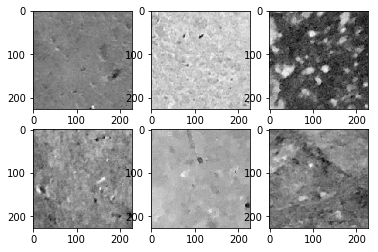

In [59]:
plt.imshow(images[0],'gray'),plt.title('ORIGINAL')

plt.subplot(231),plt.imshow(images[0],'gray')
plt.subplot(232),plt.imshow(images[1],'gray')
plt.subplot(233),plt.imshow(images[2],'gray')
plt.subplot(234),plt.imshow(images[3],'gray')
plt.subplot(235),plt.imshow(images[4],'gray')
plt.subplot(236),plt.imshow(images[5],'gray')